In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import json
from sklearn.preprocessing import LabelEncoder

In [ ]:
# https://github.com/ml-tooling/best-of-ml-python
# https://pycaret.org/

In [2]:
data_raw = "./train_PTIT.csv"
df = pd.read_csv(data_raw)

In [3]:
df

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,...,w_1424,w_1425,w_1426,w_1427,w_1428,w_1429,w_1430,w_1431,w_1432,subject
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neural_Networks
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Genetic_Algorithms
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Rule_Learning
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Genetic_Algorithms
2433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Theory
2434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Probabilistic_Methods
2435,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Neural_Networks


In [4]:
print(df.iloc[:, :-1].shape, df.iloc[:, -1].shape)

(2437, 1433) (2437,)


<AxesSubplot:>

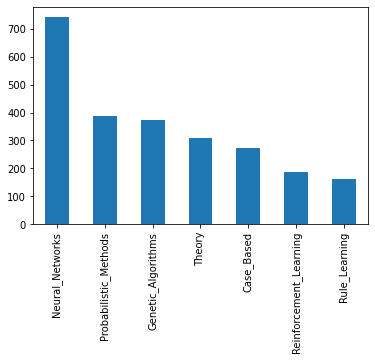

In [5]:
# visualize data
df["subject"].value_counts().plot(kind="bar")

In [6]:
df["subject"].unique()

array(['Probabilistic_Methods', 'Neural_Networks', 'Genetic_Algorithms',
       'Rule_Learning', 'Reinforcement_Learning', 'Case_Based', 'Theory'],
      dtype=object)

In [7]:
name_2_Id = {
    "Probabilistic_Methods": 0,
    "Neural_Networks": 1,
    "Genetic_Algorithms": 2,
    "Rule_Learning": 3,
    "Reinforcement_Learning": 4,
    "Case_Based": 5,
    "Theory": 6,
}

id_2_Name = {
    "0": "Probabilistic_Methods",
    "1": "Neural_Networks",
    "2": "Genetic_Algorithms",
    "3": "Rule_Learning",
    "4": "Reinforcement_Learning",
    "5": "Case_Based",
    "6": "Theory",
}

In [8]:
# preprocessing subject
df["subject"] = df["subject"].map(name_2_Id)
df

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,...,w_1424,w_1425,w_1426,w_1427,w_1428,w_1429,w_1430,w_1431,w_1432,subject
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
2433,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
2434,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2435,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [9]:
# check percent sparse of matrix
from numpy import count_nonzero
import numpy as np

A = df.iloc[:, :-1].values

# calculate sparsity
sparsity = 1.0 - ( count_nonzero(A) / float(A.size))
print(sparsity)

0.9873470207068796


In [10]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, :-1], df.iloc[:, -1], test_size=0.2, random_state=42
)

# KNN

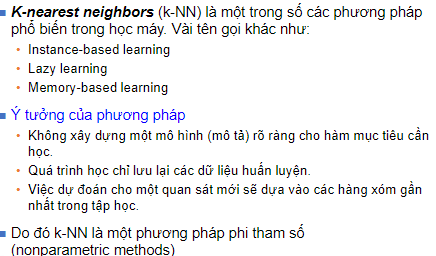

In [11]:
from IPython import display
display.Image("./utils/knn.png")

In [12]:
from sklearn import neighbors
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
# https://www.miai.vn/2020/06/16/oanh-gia-model-ai-theo-cach-mi-an-lien-chuong-2-precision-recall-va-f-score/

### Một vài tham số (Parameter)
n_neighbors: int, default=5
 
- Number of neighbors to use by default for kneighbors queries.

![5](./utils/knn5.png)

weights: {‘uniform’, ‘distance’} or callable, default=’uniform’
- Weight function used in prediction. Possible values:

+ ‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.

+ ‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

+ [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

metric: str or callable, default=’minkowski’

![2](./utils/knn2.png)
![3](./utils/knn3.png)
![4](./utils/knn4.png)



In [13]:
# define 3 vector
v1 = np.array([1, 2, 4])
v2 = np.array([1500, 2000, 1200])
v3 = np.array([1000, 2000, 3000])


# calculate euclidean distance, cosine distance
def euclidean_distance(v1, v2):
    return np.sqrt(np.sum((v1 - v2) ** 2))


def cosine_distance(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

print("euclidean_distance v1, v2: ", euclidean_distance(v1, v2))
print("euclidean_distance v1, v3: ", euclidean_distance(v1, v3))
print("euclidean_distance v2, v3: ", euclidean_distance(v2, v3))

print()

print("cosine_distance v1, v2: ", cosine_distance(v1, v2))
print("cosine_distance v1, v3: ", cosine_distance(v1, v3))
print("cosine_distance v2, v3: ", cosine_distance(v2, v3))

euclidean_distance v1, v2:  2769.3719504609703
euclidean_distance v1, v3:  3737.113993444674
euclidean_distance v2, v3:  1868.1541692269404

cosine_distance v1, v2:  0.8105212535512913
cosine_distance v1, v3:  0.9914601339836674
cosine_distance v2, v3:  0.8770295059040306


In [36]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 3, weights = 'distance', metric='euclidean')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("KNN accuracy: ", accuracy_score(y_test, y_pred))
print("KNN f1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("KNN confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

KNN accuracy:  0.48565573770491804
KNN f1 score:  0.4748094042147329
KNN confusion matrix: 
[[44 11  6  3  0  0  3]
 [34 82 24  3  4  1 10]
 [ 3  9 59  0  0  0  6]
 [ 4  5  5 10  1  3  6]
 [ 4  7  6  3 12  1  0]
 [21 13  3  1  2 16  1]
 [15  8  6  9  6  4 14]]


In [37]:
clf = neighbors.KNeighborsClassifier(n_neighbors = 3, weights = 'distance', metric='cosine')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("KNN accuracy: ", accuracy_score(y_test, y_pred))
print("KNN f1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("KNN confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

KNN accuracy:  0.7377049180327869
KNN f1 score:  0.7371369662927927
KNN confusion matrix: 
[[ 49   3   1   2   1   4   7]
 [ 10 128   4   0   4   3   9]
 [  3   4  66   1   2   0   1]
 [  1   2   1  22   2   3   3]
 [  1   4   0   2  21   4   1]
 [  4   3   2   4   0  41   3]
 [  2  10   5   4   2   6  33]]


# Logistic Regression

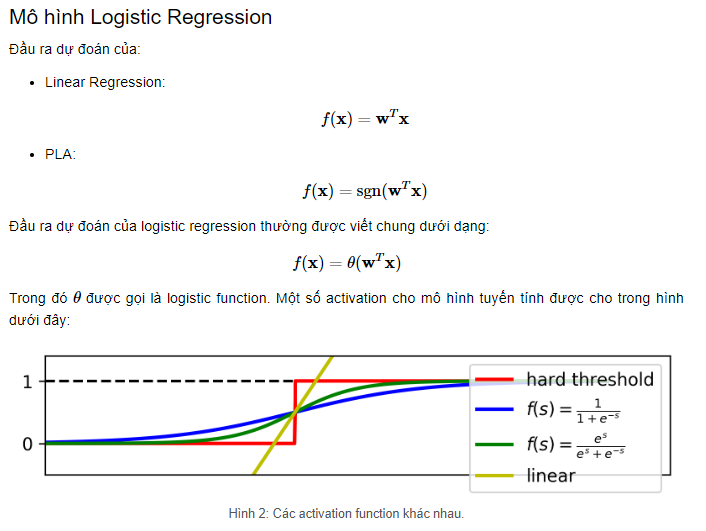

In [40]:
from IPython import display
display.Image("./utils/log_res.png")

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
# https://www.miai.vn/2020/06/16/oanh-gia-model-ai-theo-cach-mi-an-lien-chuong-2-precision-recall-va-f-score/

In [42]:
regressor = LogisticRegression()
regressor.fit(X_train, y_train)

# predict
predictions = regressor.predict(X_test)
# evaluate
print("LR classification accuracy", accuracy_score(y_test, predictions))

# matrix confusion
cm = confusion_matrix(y_test, predictions)
print(cm)

# f1 score
print("LR f1 score", f1_score(y_test, predictions, average="macro"))

LR classification accuracy 0.7930327868852459
[[ 55   6   1   2   1   2   0]
 [ 13 136   1   0   1   2   5]
 [  1   7  65   1   1   1   1]
 [  2   2   2  18   0   2   8]
 [  2   5   2   0  21   1   2]
 [  2   1   2   3   2  45   2]
 [  1   5   2   4   0   3  47]]
LR f1 score 0.7576601646430857


In [44]:
# print the coefficients
print("regressor.coef_", regressor.coef_)
print("regressor.coef_.shape", regressor.coef_.shape)


print("regressor.intercept_", regressor.intercept_)
print("regressor.intercept_.shape", regressor.intercept_.shape)

regressor.coef_ [[ 0.03221266 -0.12289695  0.08815992 ... -0.10230206  0.20477801
   0.20135708]
 [ 0.54495421  0.18432733 -0.3054115  ... -0.02607878 -0.42399465
   0.14382144]
 [ 0.121423   -0.29241293 -0.22966988 ... -0.02155709 -0.27486844
  -0.0227118 ]
 ...
 [-0.14518046  0.05115239  0.31750283 ... -0.0060337  -0.03027071
  -0.06653983]
 [-0.19399563  0.37009965  0.01414277 ... -0.03192962  0.33307885
  -0.14051157]
 [-0.23114294 -0.37516938  0.22897758 ...  0.20017505 -0.14531693
  -0.07811123]]
regressor.coef_.shape (7, 1433)
regressor.intercept_ [ 0.68943604  1.30640456  0.54224626 -0.81727678 -1.56778459 -0.05836346
 -0.09466203]
regressor.intercept_.shape (7,)


# SVM

![1](./utils/svm1.png)

![2](./utils/svm2.png)


![3](./utils/svm3.png)


![4](./utils/svm4.png)

![5](./utils/svm5.jfif)

![6](./utils/svm6.png)

Trong trường hợp đường biên phân chia đúng mọi điểm điểm dữ liệu thì được gọi là bài toán phân loại theo đường biên cứng (hard margin classification)

![7](./utils/svm7.png)
![8](./utils/svm8.png)
- trong đó C (>0) là tham số xác định mức độ phạt (penalty degree) đối với các lỗi → Giá trị C càng lớn, thì mức độ phạt càng cao đối với các lỗi

In [71]:
# svm to classify
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("SVM accuracy: ", accuracy_score(y_test, y_pred))
print("SVM f1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("SVM confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

SVM accuracy:  0.7663934426229508
SVM f1 score:  0.7653468326532188
SVM confusion matrix: 
[[ 55   5   1   2   1   2   1]
 [ 16 131   1   2   2   2   4]
 [  2  11  60   1   1   1   1]
 [  2   1   0  21   0   4   6]
 [  2   5   4   0  19   1   2]
 [  2   4   3   2   1  42   3]
 [  0   7   2   4   0   3  46]]


In [73]:
# turning hyperparameter for svm
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10],
                'gamma': [1, 0.1, 0.01],
                'kernel': ['rbf', 'linear', 'poly']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.297 total time=   3.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.297 total time=   4.2s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.300 total time=   3.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.300 total time=   2.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.301 total time=   2.6s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.682 total time=   1.3s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.746 total time=   1.2s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.779 total time=   1.3s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.705 total time=   1.2s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.725 total time=   1.3s
[CV 1/5] END .......C=0.1, gamma=1, kernel=poly;, score=0.551 total time=   2.3s
[CV 2/5] END .......C=0.1, gamma=1, kernel=poly

In [74]:
# print best parameter after tuning
print(grid.best_params_)
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
# print accuracy score
print("SVM accuracy: ", accuracy_score(y_test, grid.predict(X_test)))
print("SVM f1 score: ", f1_score(y_test, grid.predict(X_test), average='weighted'))
print("SVM confusion matrix: ")
print(confusion_matrix(y_test, grid.predict(X_test)))

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=10, gamma=0.01)
SVM accuracy:  0.7725409836065574
SVM f1 score:  0.7718304330795098
SVM confusion matrix: 
[[ 54   7   1   2   1   1   1]
 [ 13 132   1   0   1   5   6]
 [  2  11  62   1   1   0   0]
 [  3   3   0  20   0   2   6]
 [  1   8   2   0  21   0   1]
 [  2   4   1   3   0  45   2]
 [  2   9   2   3   0   3  43]]


# Random forests

![1](./utils/rf1.png)

![1](./utils/dt1.png)


![2](./utils/rf2.png)

![3](./utils/rf3.png)

In [77]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [80]:
# create classifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# train model
clf.fit(X_train, y_train)

# predict
y_pred = clf.predict(X_test)

# evaluate
print("RF accuracy: ", accuracy_score(y_test, y_pred))
print("RF f1 score: ", f1_score(y_test, y_pred, average='weighted'))
print("RF confusion matrix: ")
print(confusion_matrix(y_test, y_pred))

RF accuracy:  0.8012295081967213
RF f1 score:  0.7984185947506828
RF confusion matrix: 
[[ 57   6   0   0   0   3   1]
 [ 10 141   0   0   1   1   5]
 [  3   6  67   0   1   0   0]
 [  2   4   2  17   0   1   8]
 [  3   4   1   0  24   1   0]
 [  3   6   1   1   0  43   3]
 [  2  10   2   3   0   3  42]]


In [82]:
# hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [100,200,300]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
                'max_features': max_features,
                'min_samples_split': min_samples_split}

# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

d:\anaconda3\envs\vbd_ml\lib\site-packages\sklearn\model_selection\_search.py:296: UserWarning: The total space of parameters 18 is smaller than n_iter=100. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 3 folds for each of 18 candidates, totalling 54 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, verbose=2)

In [87]:
# print best parameter after tuning
print(rf_random.best_params_)
# print how our model looks after hyper-parameter tuning
print(rf_random.best_estimator_)
# print accuracy score
print("RF accuracy: ", accuracy_score(y_test, rf_random.predict(X_test)))
print("RF f1 score: ", f1_score(y_test, rf_random.predict(X_test), average='weighted'))
print("RF confusion matrix: ")
print(confusion_matrix(y_test, rf_random.predict(X_test)))

{'n_estimators': 300, 'min_samples_split': 2, 'max_features': 'auto'}
RandomForestClassifier(n_estimators=300, random_state=0)
RF accuracy:  0.8012295081967213
RF f1 score:  0.7996175934731945
RF confusion matrix: 
[[ 57   6   0   0   1   2   1]
 [ 12 139   0   0   1   1   5]
 [  2   8  66   0   1   0   0]
 [  1   4   1  18   0   2   8]
 [  3   4   1   0  24   1   0]
 [  3   4   1   1   0  43   5]
 [  2   8   2   3   0   3  44]]
